<a href="https://colab.research.google.com/github/mayaraperroni9/ProcessImage/blob/main/osteoporoseMAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pynrrd
!pip install slicerio
import os
#biblioteca de comandos do sistema operacional
import numpy as np
#biblioteca para a linguagem Python com funções para se trabalhar com computação numérica
import matplotlib.pyplot as plt
import nrrd
import slicerio
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 10.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#DEFININDO O DIRETÓRIO
path_mask = r'/content/drive/MyDrive/Osteoporose/3-Segmentation_NRRD'

#ACESSANDO O DIRETÓRIO DAS IMAGENS
os.chdir(path_mask)

#LENDO OS ARQUIVOS

#dicionário que armazena os arquivos
masks = dict()
masks_header = dict()

#substrings
sub1 = '3-Segmentation_NRRD/'
sub2 = '.seg.nrrd'
sub3 = '_NRRD/'

#loop que lê os arquivos
for file in os.listdir():
    #lê somente arquivos .nrrd
    if file.endswith('.nrrd'):
        file_path = f'{path_mask}/{file}'

        #pegando o index
        idx1 = file_path.index(sub1)
        idx2 = file_path.index(sub2)
        idx3 = file_path.index(sub3)

        res = ''
        #criando as chaves para o dicionário
        for idx in range(idx3 + len(sub1), idx2):
            res = res + file_path[idx]

        #lendo os arquivos nrrd
        masks[res],masks_header[res] = nrrd.read(file_path)

        #nome do paciente
        nome_pac = file_path

        #Caminho antes do nome
        cam = '/content/drive/MyDrive/Osteoporose/3-Segmentation_NRRD/'

- Para cada paciente, checar o número total de cortes [print(masks['P1L1'].shape)]
- Percorrer os cortes e nomear cada um deles. Ex: P1L1_1
- Salvar em um novo diretório. Ex: cortes_dir = r'/content/drive/MyDrive/4_Periodo/Imagens_Medicas/Avaliacao/cortes'

Obs: (70, 48, 5) -> (y, x, nº de cortes)

# Entendendo as imagens


In [ ]:
print(file_path)
print(idx1)
print(idx2)
print(idx3)
print(res)
print(sub3)

/content/drive/MyDrive/Osteoporose/3-Segmentation_NRRD/P28L4.seg.nrrd
35
60
49

_NRRD/


In [ ]:
for i in range(0,idx3):
  nome_pac = nome_pac.replace(cam[i],"")

print(nome_pac)

P28L4..


In [ ]:
print(masks['P1L1'].shape)
s = masks['P1L1'].shape

(70, 48, 5)


In [ ]:
print(s)
print(s[2])

(70, 48, 5)
5


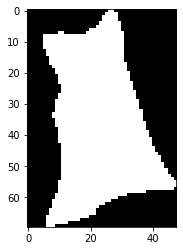

In [ ]:
plt.imshow(masks['P1L1'][:,:,4], cmap='gray')
plt.show()

# Imprimir os cortes para um único paciente

In [ ]:
#Imprimindo todos os cortes de um único paciente
m = masks['P1L1'].shape
n_corte = m[2]
for n in range(n_corte):
    plt.imshow(masks['P1L1'][:,:,n], cmap='gray')
    plt.show()

# Salvar imagens de todos os cortes de cada lesão/paciente no diretório 'cortes'

In [ ]:
#Tentativa sem pegar o index completo (montamos a tag manualmente)
os.chdir(path_mask)
tam_dir = len(os.listdir())
for indice1 in range(1, tam_dir):
  for indice2 in range(1, tam_dir):
    m = masks['P'+str(indice1)+'L'+str(indice2)].shape
    n_corte = m[2]
    for n in range(n_corte):
        plt.imshow(masks['P'+str(indice1)+'L'+str(indice2)][:,:,n], cmap='gray')
        plt.show()



In [ ]:
os.chdir(path_mask)
path_cortes = r'/content/drive/MyDrive/4_Periodo/Imagens_Medicas/Avaliacao/cortes'

for file in os.listdir():
    #lê somente arquivos .nrrd
    if file.endswith('.nrrd'):
        file_path = f'{path_mask}/{file}'

        #pegando o index
        idx1 = file_path.index(sub1)
        idx2 = file_path.index(sub2)

        res = ''
        #criando as chaves para o dicionário
        for idx in range(idx1 + len(sub1), idx2):
            res = res + file_path[idx]

        #lendo os arquivos nrrd
        masks[res],masks_header[res] = nrrd.read(file_path)
        m = masks[res].shape
        n_corte = m[2]

        os.chdir(path_cortes)

        for n in range(n_corte):
          nrrd.write(res+'_C'+str(n), masks[res][:,:,n])
          #plt.imshow(masks[res][:,:,n], cmap='gray')
          #plt.show()

# Continuação Matheus

In [ ]:
#DEFININDO O DIRETÓRIO
path_images = r'/content/drive/MyDrive/4_Periodo/Imagens_Medicas/Avaliacao/2-Rescaled_256_NRRD'

#ACESSANDO O DIRETÓRIO DAS IMAGENS
os.chdir(path_images)

#LENDO OS ARQUIVOS

#dicionário que armazena os arquivos
images = dict()

#substrings
sub1 = '2-Rescaled_256_NRRD/'
sub2 = '.nrrd'

#loop que lê os arquivos
for file in os.listdir():
    #lê somente arquivos .nrrd
    if file.endswith('.nrrd'):
        file_path = f'{path_images}/{file}'

        #pegando o index
        idx1 = file_path.index(sub1)
        idx2 = file_path.index(sub2)

        res = ''
        #criando as chaves para o dicionário
        for idx in range(idx1 + len(sub1), idx2):
            res = res + file_path[idx]

        #lendo os arquivos nrrd
        images[res],_ = nrrd.read(file_path)

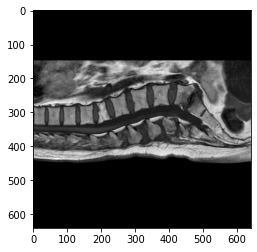

In [ ]:
plt.imshow(images['P1'][:,:,7], cmap='gray' )
plt.show()

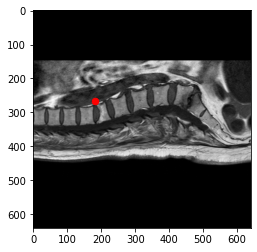

In [ ]:
plt.imshow(images['P1'][:,:,5],cmap='gray', zorder=0)
plt.scatter(182,267, color='red', s=42,zorder=1)

In [ ]:
def submatrix(arr):
    x, y = np.nonzero(arr)
    # Using the smallest and largest x and y indices of nonzero elements,
    # we can find the desired rectangular bounds.
    # And don't forget to add 1 to the top bound to avoid the fencepost problem.
    return arr[x.min():x.max()+1, y.min():y.max()+1]

In [ ]:
def segmentarImagem(mask,header,image):

    #mapeia a referência da imagem original de string para int
    refImY,refImX,refImZ = list(map(int, header['Segmentation_ReferenceImageExtentOffset'].split()))

    #pegando o tamanhoda máscara
    sizeMaskY, sizeMaskX = mask[:,:,2].shape

    #inicializando matriz segmentos
    segmentos = np.zeros(image.shape[0:2])

    #colocando a máscara dentro da matriz segmentos
    segmentos[refImY:refImY+sizeMaskY,refImX:refImX+sizeMaskX] = segmentos[refImY:refImY+sizeMaskY,refImX:refImX+sizeMaskX] + mask[:,:,0]

    #multiplicando a imagem original pela máscara
    segmentos = segmentos*image[:,:,refImZ+2]

    return submatrix(segmentos)

In [ ]:
segmentos = dict()
for im_key, im_value in images.items():
    for mask_key, mask_value in masks.items():

        if (len(im_key)==2) & (len(mask_key)==4):
            if im_key == mask_key[0:2]:
                segmentos[mask_key] = segmentarImagem(masks[mask_key],masks_header[mask_key],images[im_key])

        elif (len(im_key)==3) & (len(mask_key)==5):
            if im_key == mask_key[0:3]:
                segmentos[mask_key] = segmentarImagem(masks[mask_key],masks_header[mask_key],images[im_key])

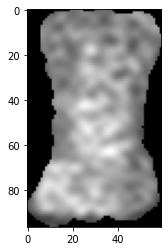

In [ ]:
plt.imshow(segmentos['P42L4'],cmap='gray')
plt.show()